## Домашнее задание к занятию №1 от 30.09.2019 г. «Введение в Feature Engineering»
ФИО: Кривова Татьяна Сергеевна

**Задание**. Необходимо запустить практическую часть занятия.

По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown.

In [15]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Целевая метрика - курс акций Сургутнефтегаз-п (SNGS_p). Посмотрим ежемесячные значения в рублях за последние 15 лет (с 31 января 2005 по 30 сентября 2019 г.)

Определим корреляцию с курсом доллара. Построим линейную регрессию, посмотрим метрики качества.

In [3]:
quotes = pd.read_excel('quotes(cbr.ru_investing.com_statbureau.org).xlsx')

**inflation_monthly_rus** - значение инфляции (источник statbureau.org)

**usd_value, euro_value** - курсы валют (источник cbr.ru)

**oil_Brent, gold_futures, MOEX, SBER_p, SNGS_p** - биржевые показатели (источник investing.com)

In [5]:
quotes.info()
quotes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 11 columns):
date                     177 non-null datetime64[ns]
year                     177 non-null int64
month                    177 non-null int64
inflation_monthly_rus    177 non-null float64
usd_value                177 non-null float64
euro_value               177 non-null float64
oil_Brent                177 non-null float64
gold_futures             177 non-null float64
MOEX                     79 non-null float64
SBER_p                   177 non-null float64
SNGS_p                   177 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 15.3 KB


,date,year,month,inflation_monthly_rus,usd_value,euro_value,oil_Brent,gold_futures,MOEX,SBER_p,SNGS_p
0,2005-01-31,2005,1,12.70,28.0845,36.6250,45.92,421.8,NaN,7.43,15.901
1,2005-02-28,2005,2,12.96,27.7738,36.6281,50.06,436.5,NaN,8.50,18.153
2,2005-03-31,2005,3,13.63,27.8256,36.0564,54.29,428.7,NaN,8.49,16.500
3,2005-04-30,2005,4,13.77,27.7726,36.0072,51.09,435.0,NaN,8.90,15.789
4,2005-05-31,2005,5,13.84,28.0919,35.1963,50.73,416.3,NaN,9.18,14.697


In [4]:
# Подробный отчет по датасету
pandas_profiling.ProfileReport(quotes)

([<matplotlib.axis.YTick at 0xedd5110>,
 <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'Ежемесячные значения курсов акций с 2005 г. (investing.com)')

Text(0, 0.5, 'Рублей')

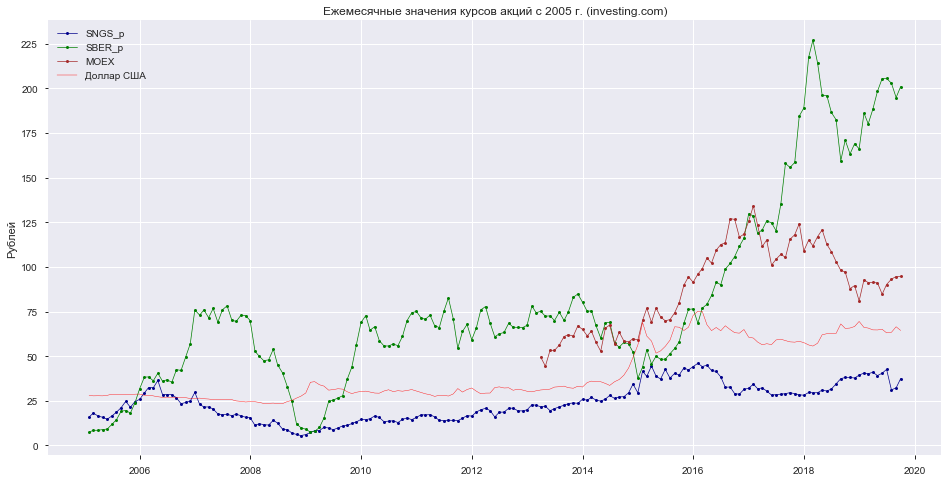

In [6]:
# Посмотрим ежемесячную динамику курсов акций MOEX, SBER_p, SNGS_p и доллара США

rcParams['figure.figsize'] = 16,8

x = quotes.date
plt.plot(x, quotes.SNGS_p, color="darkblue", marker="o", markersize=3, linewidth=0.7, label='SNGS_p')
plt.plot(x, quotes.SBER_p, color="green", marker="o", markersize=3, linewidth=0.7, label='SBER_p')
plt.plot(x, quotes.MOEX, color="brown", marker="o", markersize=3, linewidth=0.7, label='MOEX')
plt.plot(x, quotes.usd_value, color="red", linewidth=0.4, label='Доллар США')

plt.grid(True)
plt.yticks(range(0, 250, 25))
plt.title('Ежемесячные значения курсов акций с 2005 г. (investing.com)')
plt.legend()
plt.ylabel('Рублей')

Text(0.5, 1.0, 'Ежемесячные значения курсов акций в долларах США с 2005 г. (investing.com, cbr.ru)')

Text(0, 0.5, 'Долларов США')

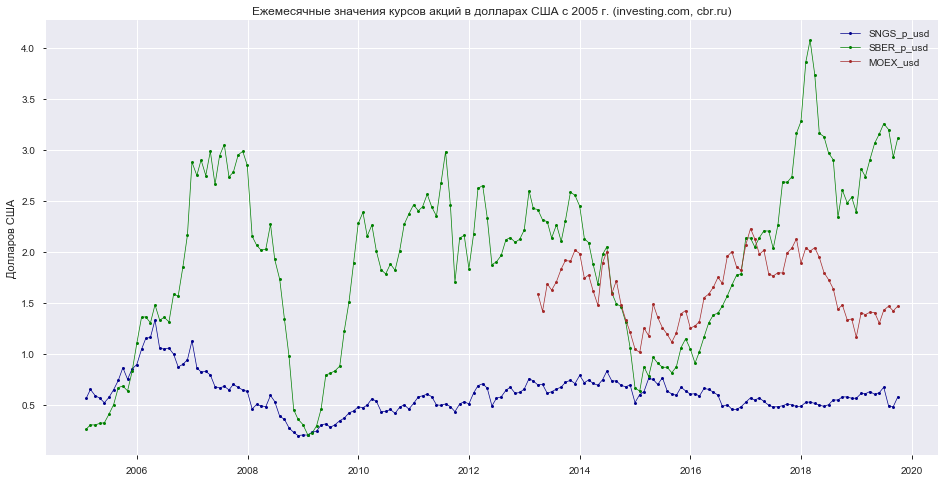

In [7]:
# Добавим признаки: курсы акций MOEX, SBER_p, SNGS_p в долларах США и посмотрим график

quotes['MOEX_usd'] = quotes.MOEX/quotes.usd_value
quotes['SBER_p_usd'] = quotes.SBER_p/quotes.usd_value
quotes['SNGS_p_usd'] = quotes.SNGS_p/quotes.usd_value

# в столбцах MOEX и MOEX_usd есть отсутствующие значения

x = quotes.date
plt.plot(x, quotes.SNGS_p_usd, color="darkblue", marker="o", markersize=3, linewidth=0.7, label='SNGS_p_usd')
plt.plot(x, quotes.SBER_p_usd, color="green", marker="o", markersize=3, linewidth=0.7, label='SBER_p_usd')
plt.plot(x, quotes.MOEX_usd, color="brown", marker="o", markersize=3, linewidth=0.7, label='MOEX_usd')

plt.grid(True)
plt.title('Ежемесячные значения курсов акций в долларах США с 2005 г. (investing.com, cbr.ru)')
plt.legend()
plt.ylabel('Долларов США')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DC70B50>,
      dtype=object)

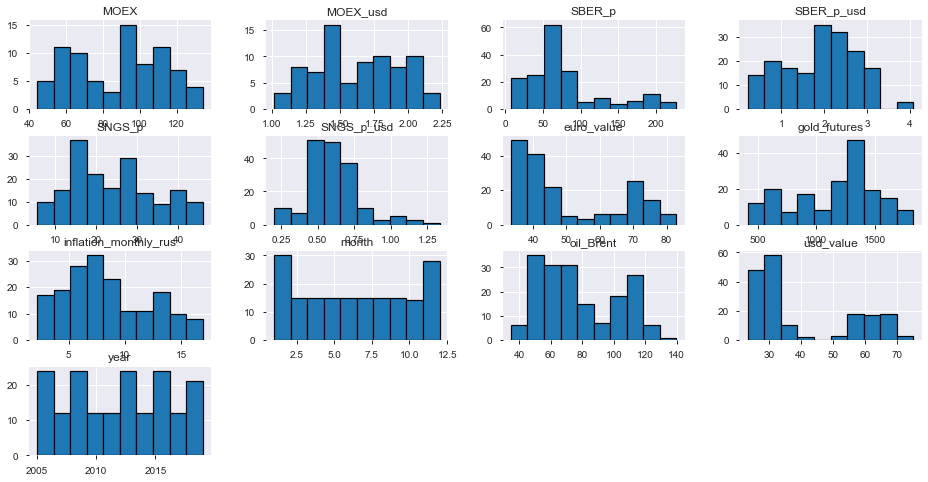

In [8]:
quotes.hist(edgecolor='black', linewidth=1.2) # Распределения

Text(0.5, 1.0, 'Ящик с усами для целевой метрики SNGS_p (sns.boxplot)')

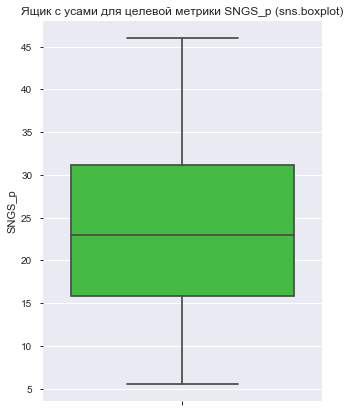

In [9]:
rcParams['figure.figsize'] = 5,7

sns.boxplot(y=quotes.SNGS_p, color="limegreen")
plt.title('Ящик с усами для целевой метрики SNGS_p (sns.boxplot)') # выбросов нет

Text(0.5, 1.0, 'Ящик с усами для параметра SNGS_p_usd (sns.boxplot)')

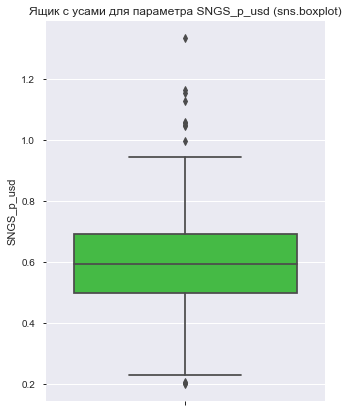

In [10]:
sns.boxplot(y=quotes.SNGS_p_usd, color="limegreen")
plt.title('Ящик с усами для параметра SNGS_p_usd (sns.boxplot)') # выбросы есть

,year,month,inflation_monthly_rus,usd_value,euro_value,oil_Brent,gold_futures,MOEX,SBER_p,SNGS_p,MOEX_usd,SBER_p_usd,SNGS_p_usd
year,1,-0.0372,-0.555,0.862,0.889,-0.12,0.707,0.696,0.794,0.67,0.00889,0.39,-0.219
month,-0.0372,1,-0.0167,0.00808,0.0129,-0.00364,0.017,-0.0143,-0.000756,-0.0536,-0.0108,-0.00824,-0.0828
inflation_monthly_rus,-0.555,-0.0167,1,-0.307,-0.332,-0.135,-0.546,-0.436,-0.74,-0.223,-0.594,-0.718,-0.00707
usd_value,0.862,0.00808,-0.307,1,0.987,-0.537,0.342,0.692,0.672,0.827,-0.301,0.102,-0.151
euro_value,0.889,0.0129,-0.332,0.987,1,-0.467,0.397,0.671,0.7,0.782,-0.298,0.152,-0.213
oil_Brent,-0.12,-0.00364,-0.135,-0.537,-0.467,1,0.452,-0.68,-0.103,-0.434,0.211,0.37,0.0574
gold_futures,0.707,0.017,-0.546,0.342,0.397,0.452,1,-0.273,0.45,0.188,0.371,0.428,-0.254
MOEX,0.696,-0.0143,-0.436,0.692,0.671,-0.68,-0.273,1,0.6,0.286,0.47,0.312,-0.773
SBER_p,0.794,-0.000756,-0.74,0.672,0.7,-0.103,0.45,0.6,1,0.528,0.274,0.756,-0.0847
SNGS_p,0.67,-0.0536,-0.223,0.827,0.782,-0.434,0.188,0.286,0.528,1,-0.578,0.102,0.413


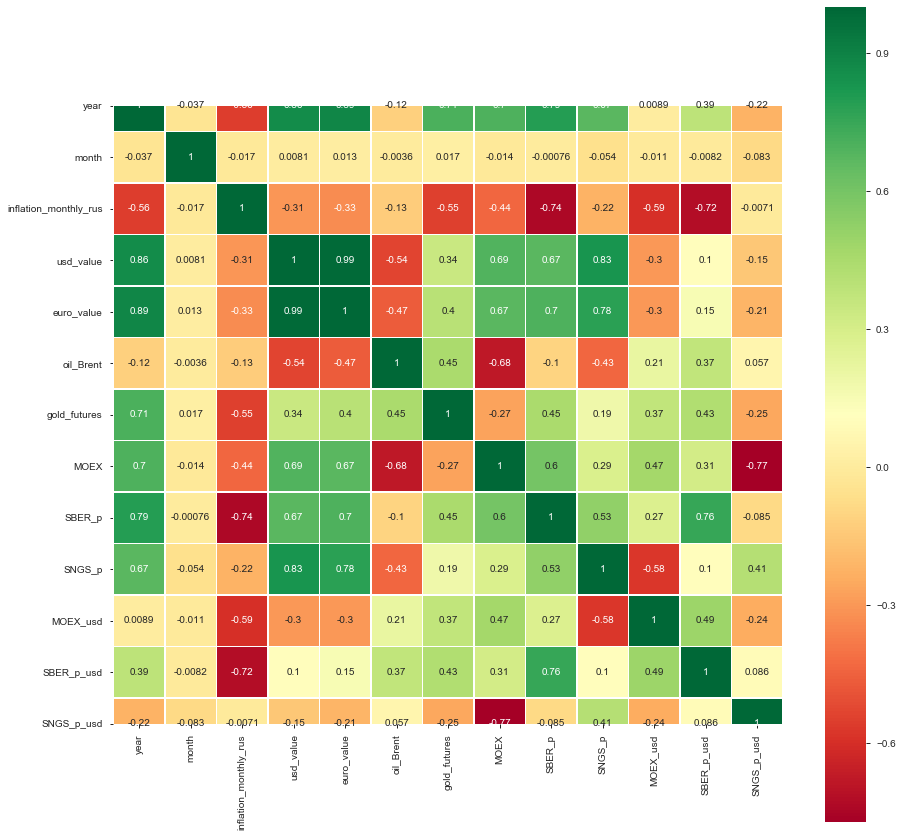

In [11]:
rcParams['figure.figsize'] = 15,15

corr_matrix = quotes.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3) # матрица корреляций

sns.heatmap(corr_matrix, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

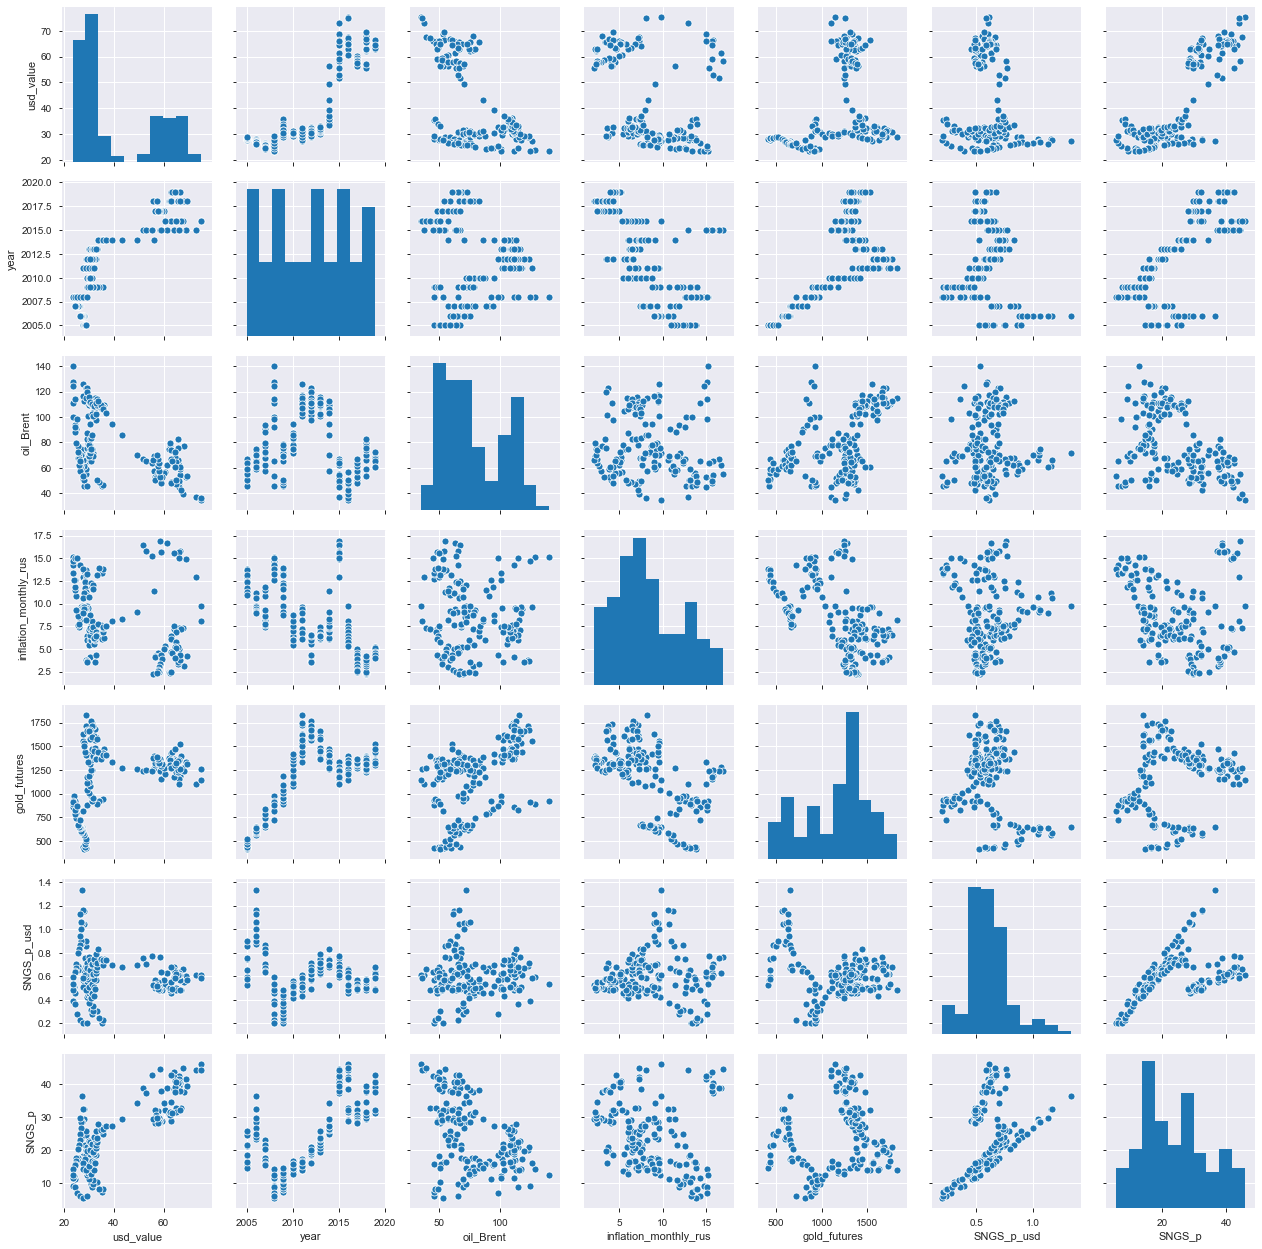

In [12]:
# Возьмем параметры: usd_value, year, oil_Brent, inflation_monthly_rus, gold_futures, SNGS_p_usd 
# для предсказания курса акций SNGS_p

sns.pairplot(quotes[['usd_value', 'year', 'oil_Brent', 'inflation_monthly_rus', 'gold_futures', 'SNGS_p_usd', 'SNGS_p']])

In [13]:
raw_data = quotes[['usd_value', 'year', 'oil_Brent', 'inflation_monthly_rus', 'gold_futures', 'SNGS_p_usd', 'SNGS_p']]

raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
usd_value                177 non-null float64
year                     177 non-null int64
oil_Brent                177 non-null float64
inflation_monthly_rus    177 non-null float64
gold_futures             177 non-null float64
SNGS_p_usd               177 non-null float64
SNGS_p                   177 non-null float64
dtypes: float64(6), int64(1)
memory usage: 9.7 KB


,usd_value,year,oil_Brent,inflation_monthly_rus,gold_futures,SNGS_p_usd,SNGS_p
0,28.0845,2005,45.92,12.70,421.8,0.566184,15.901
1,27.7738,2005,50.06,12.96,436.5,0.653602,18.153
2,27.8256,2005,54.29,13.63,428.7,0.592979,16.500
3,27.7726,2005,51.09,13.77,435.0,0.568510,15.789
4,28.0919,2005,50.73,13.84,416.3,0.523176,14.697


In [14]:
raw_data.describe()

,usd_value,year,oil_Brent,inflation_monthly_rus,gold_futures,SNGS_p_usd,SNGS_p
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,40.532954,2011.881356,77.701469,8.469774,1162.770056,0.607600,24.184237
std,16.061753,4.271010,24.561172,3.809420,360.628165,0.184096,10.226187
min,23.445600,2005.000000,34.740000,2.200000,416.300000,0.201405,5.560000
25%,28.424400,2008.000000,57.540000,5.950000,913.900000,0.499409,15.790000
50%,31.568700,2012.000000,71.410000,7.600000,1265.400000,0.592979,23.000000
75%,58.016900,2016.000000,102.160000,11.360000,1398.900000,0.693129,31.140000
max,75.172300,2019.000000,139.830000,16.930000,1828.500000,1.334609,45.995000


In [16]:
# Подготовка данных для модели. Масштабирование

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) 
np_scaled = min_max_scaler.fit_transform(raw_data)
data_norm = pd.DataFrame(np_scaled)

data_norm.columns = ['usd_value', 'year', 'oil_Brent', 'inflation_monthly_rus', 'gold_futures', 'SNGS_p_usd', 'SNGS_p']

In [17]:
data_norm.info()
data_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
usd_value                177 non-null float64
year                     177 non-null float64
oil_Brent                177 non-null float64
inflation_monthly_rus    177 non-null float64
gold_futures             177 non-null float64
SNGS_p_usd               177 non-null float64
SNGS_p                   177 non-null float64
dtypes: float64(7)
memory usage: 9.7 KB


,usd_value,year,oil_Brent,inflation_monthly_rus,gold_futures,SNGS_p_usd,SNGS_p
0,0.089681,0.0,0.106385,0.712831,0.003895,0.321900,0.255744
1,0.083674,0.0,0.145780,0.730482,0.014304,0.399042,0.311438
2,0.084676,0.0,0.186031,0.775967,0.008781,0.345546,0.270558
3,0.083651,0.0,0.155581,0.785472,0.013242,0.323953,0.252974
4,0.089824,0.0,0.152155,0.790224,0.000000,0.283947,0.225968


In [18]:
data_norm.describe()

,usd_value,year,oil_Brent,inflation_monthly_rus,gold_futures,SNGS_p_usd,SNGS_p
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.330339,0.491525,0.408806,0.425647,0.528587,0.358448,0.460597
std,0.310512,0.305072,0.233716,0.258616,0.255366,0.162456,0.252904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096252,0.214286,0.216957,0.254582,0.352358,0.262974,0.252999
50%,0.157039,0.500000,0.348939,0.366599,0.601260,0.345546,0.431310
75%,0.668345,0.785714,0.641545,0.621860,0.695794,0.433923,0.632620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Первая модель - многомерная линейная регрессия с 6 признаками.

In [19]:
output_y = data_norm.SNGS_p
input_x = data_norm[['usd_value', 'year', 'oil_Brent', 'inflation_monthly_rus', 'gold_futures', 'SNGS_p_usd']]

X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, train_size=0.8, random_state=25)

model = LinearRegression().fit(X_train, y_train)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.20605145848188983
slope: [0.7013165  0.10241722 0.02487364 0.12636329 0.01179563 0.88347309]


In [20]:
model.score(X_train, y_train) # coefficient of determination R^2 of the prediction

0.9892536979272356

In [22]:
pred_values = model.predict(X_test)

print(f'mean_absolute_error: {mean_absolute_error(y_test, pred_values)}')
print(f'mean_squared_error: {mean_squared_error(y_test, pred_values)}')
print(f'r2_score: {r2_score(y_test, pred_values)}')

# Вывод: получилась вполне адекватная модель. Учитывая что среднее значение нормированной целевой метрики 0.460597 (получилась ошибка около 5%)

mean_absolute_error: 0.02115594592882107
mean_squared_error: 0.0008213441270054355
r2_score: 0.9827447726313012


Для второй модели оставим 2 признака - usd_value, oil_Brent.

In [23]:
output_y = data_norm.SNGS_p
input_x = data_norm[['usd_value', 'oil_Brent']]

X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, train_size=0.8, random_state=35)

model = LinearRegression().fit(X_train, y_train)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.218456471536969
slope: [0.69469549 0.02075654]


In [24]:
model.score(X_train, y_train) # coefficient of determination R^2 of the prediction

0.7042668555759697

In [25]:
pred_values = model.predict(X_test)

print(f'mean_absolute_error: {mean_absolute_error(y_test, pred_values)}')
print(f'mean_squared_error: {mean_squared_error(y_test, pred_values)}')
print(f'r2_score: {r2_score(y_test, pred_values)}')

# Вывод: качество модели получилось хуже после исключения признаков. 
# Учитывая что среднее значение нормированной целевой метрики 0.460597 (получилась ошибка около 27%)

mean_absolute_error: 0.12454263491771206
mean_squared_error: 0.02289800513205764
r2_score: 0.5856459342001739


Третья модель - одномерная линейная регрессия, с признаком usd_value.

In [26]:
output_y = data_norm.SNGS_p
input_x = data_norm.usd_value

x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, train_size=0.8, random_state=45)

model = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.24339564526058882
slope: [0.66390015]


In [27]:
model.score(np.array(x_train).reshape(-1,1), y_train) # coefficient of determination R^2 of the prediction

0.634072441489048

In [28]:
pred_values = model.predict(np.array(x_test).reshape(-1,1))

print(f'mean_absolute_error: {mean_absolute_error(y_test, pred_values)}')
print(f'mean_squared_error: {mean_squared_error(y_test, pred_values)}')
print(f'r2_score: {r2_score(y_test, pred_values)}')

# Вывод: получилась вполне адекватная модель. Учитывая что среднее значение нормированной целевой метрики 0.460597 (получилась ошибка около %)

mean_absolute_error: 0.08969072968606964
mean_squared_error: 0.013187646962437948
r2_score: 0.8201593387436001


In [30]:
print(f'Коэффициент Пирсона: {round(np.corrcoef(data_norm.usd_value, data_norm.SNGS_p)[0,1], 3)}')

Коэффициент Пирсона: 0.827


Text(0.5, 0, 'usd_value_norm')

Text(0, 0.5, 'SNGS_p_norm')

Text(0.5, 1.0, 'Линейная регрессия: y = 0.664*x + 0.243')

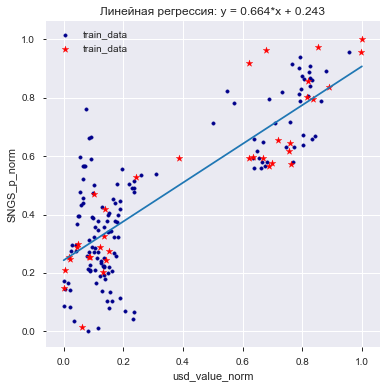

In [33]:
# Посмотрим график

rcParams['figure.figsize'] = 6,6

plt.xlabel('usd_value_norm')
plt.ylabel('SNGS_p_norm')
plt.title('Линейная регрессия: y = 0.664*x + 0.243')

x = np.linspace(0, 1, 200)
y = model.coef_*x + model.intercept_

plt.plot(x,y)
plt.scatter(x_train, y_train, color="darkblue", marker=".", label='train_data')
plt.scatter(x_test, y_test, color="red", marker="*", label='train_data')

plt.grid(True)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Точечный график зависимости двух выборок usd_value_norm и SNGS_p_norm (sns.regplot)')

Text(0.5, 0, 'usd_value_norm')

Text(0, 0.5, 'SNGS_p_norm')

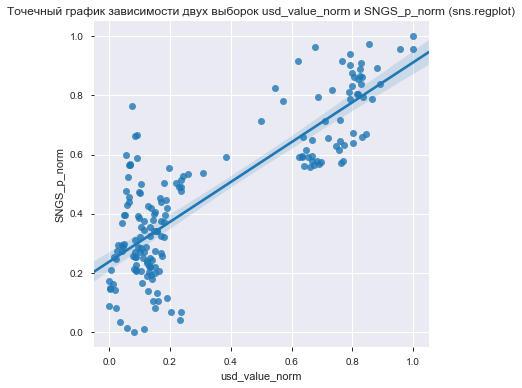

In [34]:
sns.regplot(x=data_norm['usd_value'], y=data_norm['SNGS_p'], data=data_norm, fit_reg=True)

plt.title('Точечный график зависимости двух выборок usd_value_norm и SNGS_p_norm (sns.regplot)')
plt.xlabel('usd_value_norm')
plt.ylabel('SNGS_p_norm')